# Stanford CME 241 (Winter 2025) - Assignment 1

**Due: Sunday, January 19 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/ranystephan/RL-book/blob/master/ranycs_assts_solving/ranycs_asst1/ranycs_assignment1.ipynb

*Group members (replace below names with people in your group):* 
- Rany Stephan - ranycs@stanford.edu
- Corentin Servouze - cosrv@stanford.edu

## Imports

In [3]:
!pip3 install graphviz
!pip3 install numpy
import sys 
sys.path.append('/Users/ranystephan/Desktop/problemst/cme241/RL-book/')
import random
import matplotlib.pyplot as plt

## Question 1: Snakes and Ladders (Led by Rany)

In the classic childhood game of Snakes and Ladders, all players start to the left of square 1 (call this position 0) and roll a 6-sided die to represent the number of squares they can move forward. The goal is to reach square 100 as quickly as possible. Landing on the bottom rung of a ladder allows for an automatic free-pass to climb, e.g. square 4 sends you directly to 14; whereas landing on a snake's head forces one to slide all the way to the tail, e.g. square 34 sends you to 6. Note, this game can be viewed as a Markov Process, where the outcome is only depedent on the current state and not the prior trajectory. In this question, we will ask you to both formally describe the Markov Process that describes this game, followed by coding up a version of the game to get familiar with the RL-book libraries.


### Problem Statement

How can we model this problem with a Markov Process?

---

### Subquestions

#### Part (A): MDP Modeling

Formalize the state space of the Snakes and Ladders game. Don't forget to specify the terminal state!

---

#### Part (B): Transition Probabilities

Write out the structure of the transition probabilities. Feel free to abbreviate all squares that do not have a snake or ladder.

---

#### Part (C): Modeling the Game

Code up a `transition_map: Transition[S]` data structure to represent the transition probabilities of the Snakes and Ladders Markov Process so you can model the game as an instance of `FiniteMarkovProcess`. Use the `traces` method to create sampling traces, and plot the graph of the distribution of time steps to finish the game. Use the image below for the locations of the snakes and ladders.

![Snakes and Ladders](./Figures/snakesAndLadders.png)

---

### Part (A) Answer

<span style="color:red">


The state space $S$ consists of all the squares on the board, including the starting position (0) and the terminal state (100). Therefore, $$ S = \{0, 1, 2, \ldots, 100\} $$

The *terminal state* is the square 100, which is the goal of the game. Once a player reaches this state, the game ends.

</span>

### Part (B) Answer

<span style="color:red">
The transition probabilities for each square can be defined as follows:

- For squares without snakes or ladders, the transition probability is uniformly distributed over the next 6 squares (or fewer if near the end of the board).
- For squares with ladders, the transition probability is 1 for the square at the top of the ladder.
- For squares with snakes, the transition probability is 1 for the square at the tail of the snake.

For example, if a player is on square 1, the transition probabilities are:
- P(2|1) = 1/6
- P(3|1) = 1/6
- P(4|1) = 1/6
- P(5|1) = 1/6
- P(6|1) = 1/6
- P(7|1) = 1/6

We could also write it as this. If a player is on square k, the transition probabilities are:
- P(k+1|k) = 1/6
- P(k+2|k) = 1/6
- P(k+3|k) = 1/6
- P(k+4|k) = 1/6
- P(k+5|k) = 1/6
- P(k+6|k) = 1/6

If a player is on square 4 (bottom of a ladder to 14), the transition probability is:
- P(14|4) = 1

If a player is on square 34 (head of a snake to 6), the transition probability is:
- P(6|34) = 1


We can therefore have $P(s'|s) = \frac{1}{6}$ if $s' = s+r$.

Now, if $s\geq 94$, we have to ensure that players to not exceed position 100. For example, $T(97, 100) = \frac{2}{6}$ because rolling 3 or more lands the player at 100. 

</span>

### Part (C) Answer

In [12]:
import sys 
sys.path.append('/Users/ranystephan/Desktop/problemst/cme241/RL-book/')

In [124]:


#    Key = the square where a snake head or ladder base starts
#    Value = the square it takes us to (snake tail or ladder top).
snakes_ladders = {
    4: 14, 8: 20, 21: 42, 28: 76, 32: 10, 36: 6,
    48: 26, 50: 67, 62: 18, 71: 92, 80: 99, 88: 24,
    95: 56, 97: 78
}

# Build a transition_map for states 0..99.
#    State 100 will be absorbed as a terminal state.
#    This example allows "overshooting" 100 => immediate terminal.
from collections import defaultdict
from typing import Dict
from rl.distribution import Categorical
from rl.markov_process import NonTerminal, Terminal, FiniteMarkovProcess

def build_transition_map() -> Dict[int, Categorical[int]]:
    transition_map: Dict[int, Categorical[int]] = {}

    for s in range(100):
        outcomes = defaultdict(float)
        # Each roll has probability 1/6
        for roll in range(1, 7):
            next_sq = s + roll
            # If we land on or past 100, go to 100 (terminal)
            if next_sq >= 100:
                outcomes[100] += 1/6
            else:
                # Check for snake or ladder
                if next_sq in snakes_ladders:
                    next_sq = snakes_ladders[next_sq]
                outcomes[next_sq] += 1/6
        transition_map[s] = Categorical(outcomes)

    return transition_map

transition_map = build_transition_map()

# 3. Create a FiniteMarkovProcess for Snakes & Ladders
snakes_ladders_mp = FiniteMarkovProcess(transition_map)
print(snakes_ladders_mp) 


From State 0:
  To State 1 with Probability 0.167
  To State 2 with Probability 0.167
  To State 3 with Probability 0.167
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
From State 1:
  To State 2 with Probability 0.167
  To State 3 with Probability 0.167
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
  To State 7 with Probability 0.167
From State 2:
  To State 3 with Probability 0.167
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
  To State 7 with Probability 0.167
  To State 20 with Probability 0.167
From State 3:
  To State 14 with Probability 0.167
  To State 5 with Probability 0.167
  To State 6 with Probability 0.167
  To State 7 with Probability 0.167
  To State 20 with Probability 0.167
  To State 9 with Probability 0.167
From State 4:
  To State 5 with Probability 0.167
  To State 6 with Probab

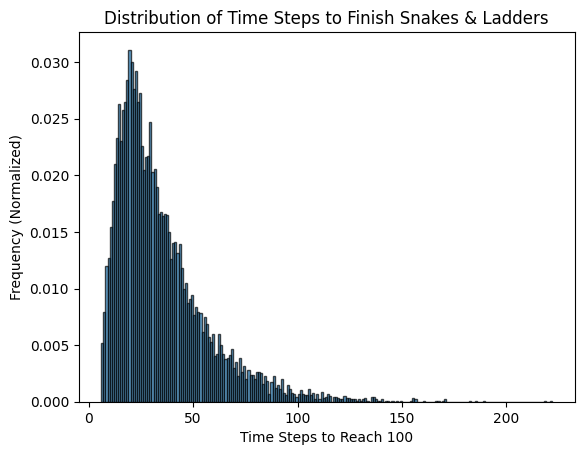

In [125]:

from rl.distribution import Constant

def simulate_single_game(mdp: FiniteMarkovProcess[int]) -> int:
    """
    Simulates one Snakes & Ladders game starting from state 0
    and returns the number of time-steps needed to reach terminal.
    """
    start_dist = Constant(NonTerminal(0))  # always start at NonTerminal(0)
    trace_iter = mdp.simulate(start_dist)  # an iterable of states
    steps = 0
    for state in trace_iter:
        # Once we yield a Terminal state, we are done
        if isinstance(state, Terminal):
            return steps
        steps += 1
    return steps

# 5. We run many simulations, and record the time steps to finish, and plot.
NUM_SIMULATIONS = 10_000
finishing_times = [
    simulate_single_game(snakes_ladders_mp) for _ in range(NUM_SIMULATIONS)
]

plt.hist(finishing_times, bins=range(min(finishing_times), max(finishing_times) + 2),
         alpha=0.7, edgecolor='black', density=True)
plt.xlabel("Time Steps to Reach 100")
plt.ylabel("Frequency (Normalized)")
plt.title("Distribution of Time Steps to Finish Snakes & Ladders")
plt.show()

## Question 2: Markov Decision Processes (Led by Rany)

Consider an MDP with an infinite set of states $\mathcal{S} = \{1,2,3,\ldots \}$. The start state is $s=1$. Each state $s$ allows a continuous set of actions $a \in [0,1]$. The transition probabilities are given by: 
$$\mathbb{P}[s+1 \mid s, a] = a, \mathbb{P}[s \mid s, a] = 1 - a \text{ for all } s \in \mathcal{S} \text{ for all } a \in [0,1]$$
For all states $s \in \mathcal{S}$ and actions $a \in [0,1]$, transitioning from $s$ to $s+1$ results in a reward of $1-a$ and transitioning from $s$ to $s$ results in a reward of $1+a$. The discount factor $\gamma=0.5$.

### Problem Statement

How can we derive a mathematical formulation for the value function and the optimal policy? And how do those functions change when we modify the action space?

---

### Subquestions

#### Part (A): Optimal Value Function  

Using the MDP Bellman Optimality Equation, calculate the Optimal Value Function $V^*(s)$ for all $s \in \mathcal{S}$. Given $V^*(s)$, what is the optimal action, $a^*$, that maximizes the optimal value function?

---

#### Part (B): Optimal Policy  

Calculate an Optimal Deterministic Policy $\pi^*(s)$ for all $s \in \mathcal{S}$.

---

#### Part (C): Changing the Action Space  

Let's assume that we modify the action space such that instead of $a \in [0,1]$ for all states, we restrict the action space to $a \in \left[0,\frac{1}{s}\right]$ for state $s$. This means that higher states have more restricted action spaces. How does this constraint affect:

- The form of the Bellman optimality equation?
- The optimal value function, $V^*(s)$?
- The structure of the optimal policy, $\pi^*(s)$?

---

### Part (A) Answer

<span style="color:red">
We get here that 

$$
\begin{align}
V^* (s) &= \max_{a\in[0,1]} [a(1-a + 0.5 V^* (s+1)) + (1-a)(1+a + 0.5 V^*(s))] \\
&= \max_{a\in[0,1]}[(1+a-2a^2) + 0.5[aV^* (s+1)+(1-a)V^*(s)]
\end{align}
$$

Now we can see here that $V^*$ does not depend on $s$. Therefore, $V^*(s)=V^*(s+1)$. 

We let $V^*(s)=v \ \forall s \in \mathcal{S}$, then 

$$
\begin{align}
v &= \max_{a\in[0,1]}[(1+a-2a^2) + 0.5[av+(1-a)v]] \\
0.5 v &= \max_{a\in[0,1]}[1+a-2a^2]
\end{align}
$$

Now, to find the max values, we take the first derivative which is equal to $1-4a$, set it to 0. We then get the critical value $a = \frac{1}{4}$. 

Finally since the double derivative is equal to $-4$, we know that this critical point yields a maxima. Plugging it in the function, we get that 
$$
V^*(s) = 2.25 \text{ with } a^* = \frac{1}{4} \ \forall \ s \in \mathcal{S}
$$


</span>

### Part (B) Answer

<span style="color:red">

Based on our previous question, an optimal deterministic policy $\pi^* (s)$ is $\frac{1}{4} \ \forall s \in \mathcal{S}$ 

</span>

### Part (C) Answer

#### Bellman Optimality Equation Change:
<span style="color:red">

The Bellman Optimality Equation change would look like this:

$$
V^* (s) = \max_{a \in [0, 1/s]}[a(1-a + 0.5 V^* (s+1)) + (1-a)(1+a + 0.5 V^*(s))]
$$

In fact, the action space is now state-dependent so the maximizatino is performed over a restricted range of actions. This affects the optimization step but does not change the general form of the equation.

</span>

#### Optimal Value Function Change:
<span style="color:red">


This time $V^*(s)$ depends on  $s$ but is decreasing, indeed we can't come back to a previous state and the constraints are only increased. Hence, using the Bellman equation we find that the optimal $a^*$ at state $s$ is given by 
$$a^* = \min\left(\frac{1}{s},\frac{1+\gamma[V^*(s+1)-V^*(s)]}{4}\right)\leq \frac{1}{4}$$
It makes sense that the optimal action is decreased because unlikely the first assumption, we would like to prevent the state to increase. Furthermore, at some point we will have $\forall s\geq s', \frac{1}{s}<\frac{1+\gamma[V^*(s+1)-V^*(s)]}{4}$, and $\forall s\geq s'$
\begin{align*}
V^*(s) = \left(1-\frac{1}{s}\right)\left(1+\frac{2}{s}\right)+\gamma\left(1-\frac{1}{s}\right)V^*(s)+\gamma\frac{1}{s}V^*(s+1)
\end{align*}
Thanks to this equation, we can deduce the following asymptotic devlopement $V^*(s) = 2+\frac{2}{s}+o\left(\frac{1}{s}\right)$ 


We can say that:

For small $s$ (ex: s = 1, 2, 3), we still have $\frac{1}{s} \geq 0.25$, so we can choose $a = 0.25$ if we want. Indeed we can show that it remains optimal for those smaller $s$. 

However, once $s$ is large enough that $\frac{1}{s} < 0.25$, we are forbidden from choosing $a = 0.25$ due to the constraint.

Therefore, for $s\leq 4$, $\frac{1}{s} \geq \frac{1}{4}$, so $a^* = \frac{1}{4}$ and $V^*(s)=2.25$. 

Then, for $s>4$, $a^* = \frac{1}{s}$, and $V^*(s)$ decreases recursively, depending on $V^*(s+1)$. 

</span>

#### Optimal Policy Change:
<span style="color:red">

For $s \leq 4$, we can still choose $a = 0.25$, so that it remains optimal. 

For $s>4$, the largest permitted $a$ is $1/s < 0.25$, so the policy hits the boundary and chooses $a = \frac{1}{s}$. 

We can write this as 

$$
\pi^*(s) = \min(0.25, \frac{1}{s})
$$

Therefore, once $s$ is large enough that $frac{1}{s} < 0.25$, we simply pick the largest feasible action, $\frac{1}{s}$. 


Ultimately, restricting $a$ to $[0, \frac{1}{s}]$ instroduces state dependency in the policy and value function for higher states, reducing achievable reqards and altering the optimal strategy. 

</span>

## Question 3: Frog in a Pond (Led by Corentin)

Consider an array of $n+1$ lilypads on a pond, numbered $0$ to $n$. A frog sits on a lilypad other than the lilypads numbered $0$ or $n$. When on lilypad $i$ ($1 \leq i \leq n-1$), the frog can croak one of two sounds: **A** or **B**. 

- If it croaks **A** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to lilypad $i-1$ with probability $\frac{i}{n}$.
  - It is thrown to lilypad $i+1$ with probability $\frac{n-i}{n}$.
  
- If it croaks **B** when on lilypad $i$ ($1 \leq i \leq n-1$):
  - It is thrown to one of the lilypads $0, \ldots, i-1, i+1, \ldots, n$ with uniform probability $\frac{1}{n}$.

A snake, perched on lilypad $0$, will eat the frog if it lands on lilypad $0$. The frog can escape the pond (and hence, escape the snake!) if it lands on lilypad $n$.

### Problem Statement

What should the frog croak when on each of the lilypads $1, 2, \ldots, n-1$, in order to maximize the probability of escaping the pond (i.e., reaching lilypad $n$ before reaching lilypad $0$)? 

Although there are multiple ways to solve this problem, we aim to solve it by modeling it as a **Markov Decision Process (MDP)** and identifying the **Optimal Policy**.

---

### Subquestions

#### Part (A): MDP Modeling

Express the frog-escape problem as an MDP using clear mathematical notation by defining the following components: 

- **State Space**: Define the possible states of the MDP. 
- **Action Space**: Specify the actions available to the frog at each state. 
- **Transition Function**: Describe the probabilities of transitioning between states for each action. 
- **Reward Function**: Specify the reward associated with the states and transitions. 

---

#### Part (B): Python Implementation

There is starter code below to solve this problem programatically. Fill in each of the $6$ `TODO` areas in the code. As a reference for the transition probabilities and rewards, you can make use of the example in slide 16/31 from the following slide deck: https://github.com/coverdrive/technical-documents/blob/master/finance/cme241/Tour-MP.pdf.

Write Python code that:

- Models this MDP.
- Solves the **Optimal Value Function** and the **Optimal Policy**.

Feel free to use/adapt code from the textbook. Note, there are other libraries that are needed to actually run this code, so running it will not do anything. Just fill in the code so that it could run assuming that the other libraries are present.

---

#### Part (C): Visualization and Analysis

After running the code, we observe the following graphs for $n=3$, $n=10$, and $n=25$:

![FrogGraphs](./Figures/frogGraphs.png)

What patterns do you observe for the **Optimal Policy** as you vary $n$ from $3$ to $25$? When the frog is on lilypad $13$ (with $25$ total), what action should the frog take? Is this action different than the action the frog should take if it is on lilypad $1$?

---

### Part (A) Answer

#### State Space:  
<span style="color:red">

The state space consists of the positions of the frog on the lilypads. The frog can be on any lilypad from $0$ to $n$, so the state space is:
$$\mathcal{S} = \{0,1,...,n\}$$
Each state represents the frog's current position on the pond, the state $0$ and $n$ are terminal state.

</span>

#### Action Space:  

<span style="color:red">

At each non-terminal state $i$, the frog has two possible actions :\
$\textbf{Action A}$ : move to $i-1$ with probability $\frac{i}{n}$ or to $i+1$ with probability $\frac{n-i}{i}$\
$\textbf{Action B}$ : move to any lilypad (except $i$) with probability $\frac{1}{n}$

</span>

#### Transition Function:  

<span style="color:red">

We have for $1\leq i\leq n-1$
\begin{align*}
\mathcal{P}(i,A,i-1) &= \frac{i}{n}\\
\mathcal{P}(i,A,i+1) &= \frac{n-i}{n}\\
\mathcal{P}(i,B,j) &= \frac{1}{n}\mathbb{I}_{j\neq i}\\
\end{align*}

</span>

#### Reward Function:  

<span style="color:red">

We know that $n$ and $0$ are terminal states, thus if we set $R_t(s) = 1 \text{ if }s = n \text{ else } 0$ and $\gamma = 1$, we indeed have 
\begin{align*}
\mathbb{E}(G_t) &= \displaystyle\sum_{t\geq 0}\mathbb{E}(R_t)\\
&=  \displaystyle\sum_{t\geq 0}\mathbb{P}(S_t = n)\\
&= \mathbb{P}(\text{reach }0\text{ before }n)\\
\end{align*}

</span>

### Part (B) Answer

In [10]:
MDPRefined = dict
def get_lily_pads_mdp(n: int) -> MDPRefined:
    data = {
        i: {
            'A': {
                i - 1: i/n,
                i + 1: (n-i)/n,
            },
            'B': {
                j: 1/n for j in range(n + 1) if j != i
            }
        } for i in range(1, n)
    }
    data[0] = {'A': {0: 1}, 'B': {0: 1}}
    data[n] = {'A': {n: 1}, 'B': {n: 1}}

    gamma = 1.0
    return MDPRefined(data, gamma)

Mapping = dict
def direct_bellman(n: int) -> Mapping[int, float]:
    vf = [0.5] * (n + 1)
    vf[0] = 0.
    vf[n] = 0.
    tol = 1e-8
    epsilon = tol * 1e4
    while epsilon >= tol:
        old_vf = [v for v in vf]
        for i in range(1, n):
            value_A = (i / n) * vf[i-1] + ((n - i) / n) * vf[i+1]
            value_B = sum(vf[j] for j in range(n + 1) if j != i) / n
            vf[i] = max(value_A, value_B)
        epsilon = max(abs(old_vf[i] - v) for i, v in enumerate(vf))
    return {v: f for v, f in enumerate(vf)}

### Part (C) Answer

<span style="color:red">

As we vary $n$ from 3 to 25, we observe that action $A$ becomes more favorable as $i$ approaches $n$, while action $B$ is more attractive when $i$ is closer to 0. This trend can be seen in Figure 3, where, when the frog is on lilypad $i = 13$, the optimal action to take is action $A$, which brings the frog closer to escaping the pond. On the other hand, when the frog is on lilypad $i = 1$, it should opt for action $B$, which provides a chance to move away from the dangerous lilypad 0, improving its chances of survival and escape.

</span>

## Question 4: Manual Value Iteration (Led by Corentin (mainly) and Rany)

Consider a simple MDP with $\mathcal{S} = \{s_1, s_2, s_3\}, \mathcal{T} = \{s_3\}, \mathcal{A} = \{a_1, a_2\}$. The State Transition Probability function  
$$\mathcal{P}: \mathcal{N} \times \mathcal{A} \times \mathcal{S} \rightarrow [0, 1]$$  
is defined as:  
$$\mathcal{P}(s_1, a_1, s_1) = 0.25, \mathcal{P}(s_1, a_1, s_2) = 0.65, \mathcal{P}(s_1, a_1, s_3) = 0.1$$  
$$\mathcal{P}(s_1, a_2, s_1) = 0.1, \mathcal{P}(s_1, a_2, s_2) = 0.4, \mathcal{P}(s_1, a_2, s_3) = 0.5$$  
$$\mathcal{P}(s_2, a_1, s_1) = 0.3, \mathcal{P}(s_2, a_1, s_2) = 0.15, \mathcal{P}(s_2, a_1, s_3) = 0.55$$  
$$\mathcal{P}(s_2, a_2, s_1) = 0.25, \mathcal{P}(s_2, a_2, s_2) = 0.55, \mathcal{P}(s_2, a_2, s_3) = 0.2$$  

The Reward Function  
$$\mathcal{R}: \mathcal{N} \times \mathcal{A} \rightarrow \mathbb{R}$$  
is defined as:  
$$\mathcal{R}(s_1, a_1) = 8.0, \mathcal{R}(s_1, a_2) = 10.0$$  
$$\mathcal{R}(s_2, a_1) = 1.0, \mathcal{R}(s_2, a_2) = -1.0$$  

Assume a discount factor of $\gamma = 1$.

### Problem Statement

Your task is to determine an Optimal Deterministic Policy **by manually working out** (not with code) the first two iterations of the Value Iteration algorithm.

---

### Subquestions

#### Part (A): 2 Iterations

1. Initialize the Value Function for each state to be its $\max$ (over actions) reward, i.e., we initialize the Value Function to be $v_0(s_1) = 10.0, v_0(s_2) = 1.0, v_0(s_3) = 0.0$. Then manually calculate $q_k(\cdot, \cdot)$ and $v_k(\cdot)$ from $v_{k - 1}(\cdot)$ using the Value Iteration update, and then calculate the greedy policy $\pi_k(\cdot)$ from $q_k(\cdot, \cdot)$ for $k = 1$ and $k = 2$ (hence, 2 iterations).

---

#### Part (B): Argument

1. Now argue that $\pi_k(\cdot)$ for $k > 2$ will be the same as $\pi_2(\cdot)$. *Hint*: You can make the argument by examining the structure of how you get $q_k(\cdot, \cdot)$ from $v_{k-1}(\cdot)$. With this argument, there is no need to go beyond the two iterations you performed above, and so you can establish $\pi_2(\cdot)$ as an Optimal Deterministic Policy for this MDP.

---

#### Part (C): Policy Evaluation

1. Using the policy $\pi_2(\cdot)$, compute the exact value function $V^{\pi_2}(s)$ for all $s\in S$.

---

#### Part (D): Sensitivity Analysis

Assume the reward for $R(s_1, a_2)$ is modified to $11.0$ instead of $10.0$.

1. Perform one iteration of Value Iteration starting from the initialized value function $v_0(s)$, where $v_0(s)$ remains the same as in the original problem.
2. Determine whether this change impacts the Optimal Deterministic Policy $\pi(\cdot)$. If it does, explain why.

---

### Part (A) Answer

We initialize the value function as:

$$
v_0(s_1) = 10.0, \quad v_0(s_2) = 1.0, \quad v_0(s_3) = 0.0.
$$

The value iteration update equation is:

$$
v_k(s) = \max_a \left[ \mathcal{R}(s, a) + \gamma \sum_{s'} \mathcal{P}(s, a, s') v_{k-1}(s') \right].
$$

#### First iteration :



$$
v_1(s_1) = \max(q_1(s_1, a_1), q_1(s_1, a_2)) = \max(11.15, 11.4) = 11.4.
$$
$$
v_1(s_2) = \max(q_1(s_2, a_1), q_1(s_2, a_2)) = \max(4.15, 2.05) = 4.15.
$$
$$
v_1(s_3) = 0.0.
$$
And the the greedy policy can be compute as $
\pi_1(s_1) = a_2, \quad \pi_1(s_2) = a_1, \quad \pi_1(s_3) = \text{N/A (terminal)}.
$

#### Second iteration :
$$
v_2(s_1) = \max(q_2(s_1, a_1), q_2(s_1, a_2)) = \max(13.5475, 12.8) = 13.5475.
$$
$$
v_2(s_2) = \max(q_2(s_2, a_1), q_2(s_2, a_2)) = \max(5.0425, 4.1325) = 5.0425.
$$
$$
v_2(s_3) = 0.0.
$$

And the the greedy policy can be compute as $\pi_2(s_1) = a_1, \quad \pi_2(s_2) = a_1, \quad \pi_2(s_3) = \text{N/A (terminal)}$.






### Part (B) Answer:  

For the state **$\mathbf{s_1}$**, the difference between the $q_k$ values for actions $a_1$ and $a_2$ can be expressed as:
$$
q_k(s_1, a_1) - q_k(s_1, a_2) = \big(R(s_1, a_1) - R(s_1, a_2)\big) + \gamma \sum_{s'} \big(P(s_1, a_1, s') - P(s_1, a_2, s')\big) v_{k-1}(s').
$$
The immediate reward difference is $R(s_1, a_1) - R(s_1, a_2) = -2$, meaning action $a_2$ starts with a reward advantage of 2 over $a_1$. However, the remaining term, which involves the weighted sum of the values $v_{k-1}(s')$, depends on the transition probabilities and favors $a_1$. Specifically, for the non-zero value states $s_1$ and $s_2$, the probabilities $P(s_1, a_1, s')$ are larger than $P(s_1, a_2, s')$. For $s_3$, the probabilities are reversed, but since $v_{k-1}(s_3) = 0$, this term does not contribute to the difference.

At iteration 2, we observe that the weighted sum term exceeds the initial reward advantage of 2 for $a_2$, as shown by the calculations:
$$
q_2(s_1, a_1) = 13.55, \quad q_2(s_1, a_2) = 12.8,
$$
where $q_2(s_1, a_1) > q_2(s_1, a_2)$. This establishes that action $a_1$ becomes preferred by iteration 2. Moreover, since the value function $v_k(s)$ is non-decreasing with each iteration, the weighted sum term will either stay the same or increase, further reinforcing the dominance of $a_1$ over $a_2$ for $k > 2$. Once $q_k(s_1, a_1)$ surpasses $q_k(s_1, a_2)$ by more than 2, the inequality holds for all subsequent iterations because the probabilities associated with $a_1$ remain larger for the non-zero value states.

Thus, we conclude that for $k > 2$, action $a_1$ will always be chosen for $s_1$, and the policy $\pi_k(s_1) = a_1$ remains optimal. This argument shows that $\pi_2(s_1) = a_1$ is the optimal deterministic policy for $s_1$, and this choice will not change in future iterations.

For the state **$\mathbf{s_2}$** the answer is more straightforward. We observe that the policy $\pi_k(s_2)$ has remained the same for two consecutive iterations ($\pi_2(s_2) = \pi_3(s_2) = \pi_4(s_2) = a_1$). This indicates that the greedy policy has stabilized, meaning that action $a_1$ consistently provides the highest $q_k(s_2, a)$ value. 

Additionally, the computed $q_k(s_2, a_1)$ and $q_k(s_2, a_2)$ values are becoming closer with each iteration. This decreasing difference between $q_k(s_2, a_1)$ and $q_k(s_2, a_2)$ reflects the fact that the value function $v_k(s_2)$ is converging, and the influence of future updates on the policy decision is diminishing. Since the greedy policy $\pi_k(s_2)$ selects the action that maximizes $q_k(s_2, a)$, and this choice has stabilized across iterations, we can conclude that the policy $\pi_k(s_2) = a_1$ is fixed for all $k > 2$. 

### Part (C) Answer:  

We know that we have $\pi^*(s) = a_1$ so we must have $v^* = R(a_1)+P(a_1)v^*$, which leads to $v^* = (I_2-P(a_1))^{-1}R(a_1)$, and finally we have $v^*(s_1) = 16.8361$ and $v^*(s_2) = 7.11865$

### Part (D) Answer

#### Value Iteration:  

We initialize the value function as:

$$
v_0(s_1) = 10.0, \quad v_0(s_2) = 1.0, \quad v_0(s_3) = 0.0.
$$

The value iteration update equation is:

$$
v_k(s) = \max_a \left[ \mathcal{R}(s, a) + \gamma \sum_{s'} \mathcal{P}(s, a, s') v_{k-1}(s') \right].
$$

#### First iteration :


$$
v_1(s_1) = \max(q_1(s_1, a_1), q_1(s_1, a_2)) = \max(11.15, 12.4) = 12.4.
$$
$$
v_1(s_2) = \max(q_1(s_2, a_1), q_1(s_2, a_2)) = \max(4.15, 2.05) = 4.15.
$$
$$
v_1(s_3) = 0.0.
$$





#### Optimal Deterministic Policy:  

We see that the greedy policy at iteration $1$ is $\pi_1(s_1) = a_2$ and $\pi_1(s_2) = a_1$, hence it will change the final policy because this time $\pi_k(s_1)$ remains $a_2$

## Question 5: Fixed-Point and Policy Evaluation True/False Questions (Led by Corentin)

### Recall Section: Key Formulas and Definitions

#### Bellman Optimality Equation
The Bellman Optimality Equation for state-value functions is:
$$
V^*(s) = \max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^*(s') \right].
$$
For action-value functions:
$$
Q^*(s, a) = R(s, a) + \gamma \sum_{s'} P(s, a, s') \max_{a'} Q^*(s', a').
$$

#### Contraction Property
The Bellman Policy Operator $B^\pi$ is a contraction under the $L^\infty$-norm:
$$
\|B^\pi(X) - B^\pi(Y)\|_\infty \leq \gamma \|X - Y\|_\infty.
$$
This guarantees convergence to a unique fixed point.

#### Policy Iteration
Policy Iteration alternates between:
1. **Policy Evaluation**: Compute $V^\pi$ for the current policy $\pi$.
2. **Policy Improvement**: Generate a new policy $\pi'$ by setting:
   $$
   \pi'(s) = \arg\max_a \left[ R(s, a) + \gamma \sum_{s'} P(s, a, s') V^\pi(s') \right].
   $$

#### Discounted Return
The discounted return from time step $t$ is:
$$
G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i,
$$
where $\gamma \in [0, 1)$ is the discount factor.

### True/False Questions (Provide Justification)

1. **True/False**: If $Q^\pi(s, a) = 5$, $P(s, a, s') = 0.5$ for $s' \in \{s_1, s_2\}$, and the immediate reward $R(s, a)$ increases by $2$, the updated action-value function $Q^\pi(s, a)$ also increases by $2$.


---

2. **True/False**: For a discount factor $\gamma = 0.9$, the discounted return for rewards $R_1 = 5, R_2 = 3, R_3 = 1$ is greater than $6$.

---

3. **True/False**: The Bellman Policy Operator $B^\pi(V) = R^\pi + \gamma P^\pi \cdot V$ satisfies the contraction property for all $\gamma \in [0, 1)$, ensuring a unique fixed point.

---

4. **True/False**: In Policy Iteration, the Policy Improvement step guarantees that the updated policy $\pi'$ will always perform strictly better than the previous policy $\pi$.

---

5. **True/False**: If $Q^\pi(s, a) = 10$ for all actions $a$ in a state $s$, then the corresponding state-value function $V^\pi(s) = 10$, regardless of the policy $\pi$.

---

6. **True/False**: The discounted return $G_t = \sum_{i=t+1}^\infty \gamma^{i-t-1} R_i$ converges to a finite value for any sequence of bounded rewards if $\gamma < 1$.

---

### Answers (Provide justification, brief explanations are fine)

#### Question 1:  

True, we know that $Q^\pi(s,a) = R(s,a)+\gamma\sum_{s'}P(s,a,s')V^\pi(s')$, hence if $R(s,a)$ is increased by $2$ then $Q^\pi(s,a)$ is also increased by $2$.

#### Question 2:  

True, we have $G_t = 5+0.9*3+0.9^2*1 = 8.51\geq 6$

#### Question 3:  

True, we have $||B^pi(X)-B^\pi(Y)||_\infty\leq \gamma||X-Y||_\infty$

#### Question 4:  

False, in Policy Iteration, the Policy Improvement step guarantees that the updated policy $\pi'$ is at least as good as the previous policy $\pi$, but it does not always perform strictly better. If the current policy is already optimal, the policy improvement step will not change the policy.


#### Question 5:  

True, if $Q^\pi(s,a) = 10$ for all actions $a$, then $V^\pi(s) = \sum\pi(s,a)Q^\pi(s,a) = 10\sum\pi(s,a)=10$

#### Question 6:  

True, if $\gamma <1$ and $R_t$ are bounded then $G_t$ converges.